In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gpflow
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from xgboost import XGBRegressor
import joblib

2024-06-15 17:50:43.180263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 17:50:43.342016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /share/apps/22.04/openmpi/4.1.5/lib:/share/apps/22.04/slurm/23.02.7/lib
2024-06-15 17:50:43.342074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-15 17:50:43.387315: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has al

In [2]:
pfts = ["Tropical", "Temperate_Broadleaf","Temperate_Deciduous"
        ,"Temperate_Coniferous","Boreal"]

var_list = ['GPP', 'NPP', 'VEGC', 'SOILORGC']


In [14]:
pfts[3:5]

['Temperate_Coniferous', 'Boreal']

In [15]:
####### train test split for future and past
# past_future_results = pd.DataFrame()
# future_results = pd.DataFrame()
# model_compare = pd.DataFrame()

for pft in pfts[3:5]:

    all_model_data = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/model_data/merged_outliers_removed/'+pft+'_cru_hist_canesm5_ssp245.csv')
    X_train_future, X_test_future, Y_train_future, Y_test_future = train_test_split(
        all_model_data.loc[all_model_data['year']>2014, ['ordinal_stand_age'
                             ,'nirr_avg', 'nirr_min', 'nirr_max', 'prec_avg',
           'prec_min', 'prec_max', 'tair_avg', 'tair_min', 'tair_max',
           'trange_avg', 'trange_min', 'trange_max', 'vpr_avg',
           'vpr_min', 'vpr_max', 'wind_avg', 'wind_min', 'wind_max','s1', 's2', 'co2']]
        , all_model_data.loc[all_model_data['year']>2014,var_list]
        , test_size=0.3, random_state=42)

    X_train = all_model_data.loc[all_model_data['year']<=2014, ['ordinal_stand_age'
                         ,'nirr_avg', 'nirr_min', 'nirr_max', 'prec_avg',
       'prec_min', 'prec_max', 'tair_avg', 'tair_min', 'tair_max',
       'trange_avg', 'trange_min', 'trange_max', 'vpr_avg',
       'vpr_min', 'vpr_max', 'wind_avg', 'wind_min', 'wind_max','s1', 's2', 'co2']]
    Y_train = all_model_data.loc[all_model_data['year']<=2014,var_list]

    X_test = all_model_data.loc[all_model_data['year']>2014, ['ordinal_stand_age'
                         ,'nirr_avg', 'nirr_min', 'nirr_max', 'prec_avg',
       'prec_min', 'prec_max', 'tair_avg', 'tair_min', 'tair_max',
       'trange_avg', 'trange_min', 'trange_max', 'vpr_avg',
       'vpr_min', 'vpr_max', 'wind_avg', 'wind_min', 'wind_max','s1', 's2', 'co2']]
    Y_test = all_model_data.loc[all_model_data['year']>2014,var_list]



    for var in var_list:

        depth = 12
        lr = 0.1
        xgb_model = XGBRegressor(max_depth=depth, learning_rate=lr)

        xgb_model.fit(X_train, Y_train[var])

        #     # Save the model
        # model_filename = f'/home/smmrrr/TEM_Analysis/TEM_Analysis/models/xgb_model_{var}_{pft}.joblib'
        # joblib.dump(xgb_model, model_filename)
        # Get predictions for X_train and X_test
        Y_train[var+'_pred'] = xgb_model.predict(X_train)
        Y_test[var+'_pred'] = xgb_model.predict(X_test)

        r2_train = r2_score(Y_train[var], Y_train[var+'_pred'])
        r2_test = r2_score(Y_test[var], Y_test[var+'_pred'])
        rmse_train = np.sqrt(mean_squared_error(Y_train[var], Y_train[var+'_pred']))
        rmse_test = np.sqrt(mean_squared_error(Y_test[var], Y_test[var+'_pred']))
        bias_train = np.mean(Y_train[var+'_pred'] - Y_train[var])
        bias_test = np.mean(Y_test[var+'_pred'] - Y_test[var])

        past_future_results = pd.concat([past_future_results, pd.DataFrame({
        'pft': [pft],
        'Variable': [var],
        'R2 Train': [r2_train],
        'R2 Test': [r2_test],
        'RMSE Train': [rmse_train],
        'RMSE Test': [rmse_test],
        'Bias Train': [bias_train],
        'Bias Test': [bias_test]
        })
                                    ])

    ####### train test split for future and past

    # for var in var_list:

        depth = 12
        lr = 0.1
        xgb_model = XGBRegressor(max_depth=depth, learning_rate=lr)

        xgb_model.fit(X_train_future, Y_train_future[var])

        #     # Save the model
        # model_filename = f'/home/smmrrr/TEM_Analysis/TEM_Analysis/models/xgb_model_{var}_{pft}.joblib'
        # joblib.dump(xgb_model, model_filename)
        # Get predictions for X_train and X_test
        Y_train_future[var+'_pred'] = xgb_model.predict(X_train_future)
        Y_test_future[var+'_pred'] = xgb_model.predict(X_test_future)

        r2_train = r2_score(Y_train_future[var], Y_train_future[var+'_pred'])
        r2_test = r2_score(Y_test_future[var], Y_test_future[var+'_pred'])
        rmse_train = np.sqrt(mean_squared_error(Y_train_future[var], Y_train_future[var+'_pred']))
        rmse_test = np.sqrt(mean_squared_error(Y_test_future[var], Y_test_future[var+'_pred']))
        bias_train = np.mean(Y_train_future[var+'_pred'] - Y_train_future[var])
        bias_test = np.mean(Y_test_future[var+'_pred'] - Y_test_future[var])

        future_results = pd.concat([future_results, pd.DataFrame({
        'pft': [pft],
        'Variable': [var],
        'R2 Train': [r2_train],
        'R2 Test': [r2_test],
        'RMSE Train': [rmse_train],
        'RMSE Test': [rmse_test],
        'Bias Train': [bias_train],
        'Bias Test': [bias_test]
        })
                                    ])

    # future_results

    # past_future_results

    all_time_results = pd.read_csv(f'/home/smmrrr/TEM_Analysis/TEM_Analysis/model_data/model_output/metrics_list_{pft}.csv')
    all_time_results['pft'] = pft
    all_time_results['period'] = 'all_time'
    past_future_results['period'] = 'historical_train_future_test'
    future_results['period'] = 'future_only'

    model_compare = pd.concat([model_compare
        ,pd.concat([all_time_results, past_future_results, future_results])
    ])
    print(model_compare)


    Variable  R2 Train   R2 Test   RMSE Train    RMSE Test  Bias Train  \
0        GPP  0.871420  0.863810    24.469933    25.187596    0.000131   
1        NPP  0.810436  0.799011    15.416914    15.880108    0.000087   
2       VEGC  0.963889  0.961520  1405.801025  1451.105353    0.032665   
3   SOILORGC  0.935536  0.931836   568.499306   584.654236   -0.001228   
0        GPP  0.907735  0.513297    19.641451    47.682044    0.000352   
..       ...       ...       ...          ...          ...         ...   
0   SOILORGC  0.941767  0.926259   356.640279   401.159342   -0.011796   
0        GPP  0.853660  0.835276    20.188363    21.450609   -0.000366   
0        NPP  0.791476  0.766836    12.795718    13.552881   -0.000327   
0       VEGC  0.900877  0.884866  1375.793220  1483.921259   -0.015729   
0   SOILORGC  0.876687  0.861460   726.749355   770.836770   -0.017793   

    Bias Test                   pft                        period  Unnamed: 0  
0    0.012519              Trop

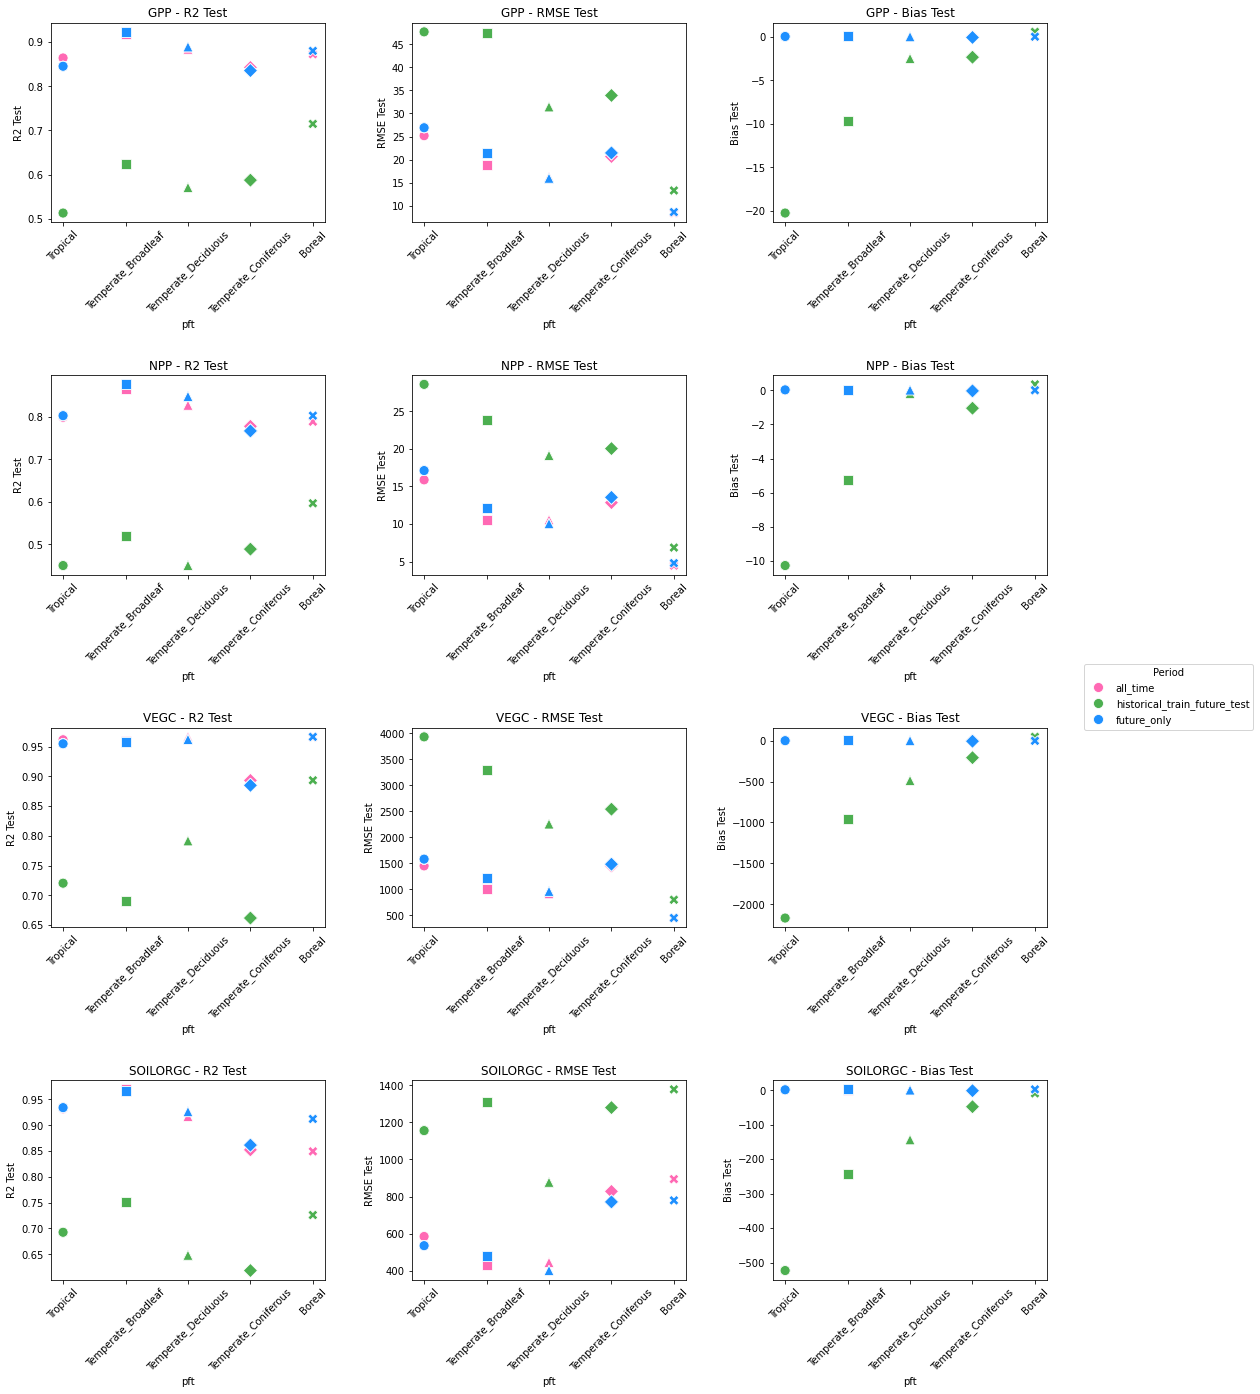

In [28]:
# Define the columns (metrics) to plot
plot_columns = ['R2 Test', 'RMSE Test', 'Bias Test']

# Define markers for each variable
markers = {pft: marker for pft, marker in zip(model_compare['pft'].unique(), ['o', 's', '^', 'D', 'X'])}

# Custom colors
colors = ['#FF69B4',  # Medium Pink
          '#4CAF50',  # Medium Green
          '#1E90FF']  # Medium blue


# Create a palette dictionary for periods
unique_periods = model_compare['period'].unique()
palette = {period: color for period, color in zip(unique_periods, colors)}

# Set up the grid size based on the number of variables and metrics
num_variables = model_compare['Variable'].nunique()
num_metrics = len(plot_columns)

fig, axes = plt.subplots(num_variables, num_metrics, figsize=(num_metrics * 6, 20))

for row_idx, variable in enumerate(model_compare['Variable'].unique()):
    for col_idx, metric in enumerate(plot_columns):
        ax = axes[row_idx, col_idx] if num_variables > 1 else axes[col_idx]
        sns.scatterplot(
            data=model_compare[model_compare['Variable'] == variable],
            x='pft',
            y=metric,
            hue='period',
            style='pft',  # Change the style to pft
            palette=palette,  # Use the custom color palette
            markers=markers,
            s=100,  # Increase marker size
            ax=ax
        )
        ax.set_title(f"{variable} - {metric}")
        ax.legend_.remove()  # Remove individual legends
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Add a single legend to the right
handles, labels = axes[0, 0].get_legend_handles_labels()
# Extract unique handles and labels for 'period'
period_handles = {label: handle for handle, label in zip(handles, labels) if label in model_compare['period'].unique()}

fig.legend(period_handles.values(), period_handles.keys(), loc='center left', bbox_to_anchor=(.85, 0.5), title="Period")

# Adjust layout for better readability
fig.tight_layout(pad=3.0, rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to make room for the legend

plt.show()

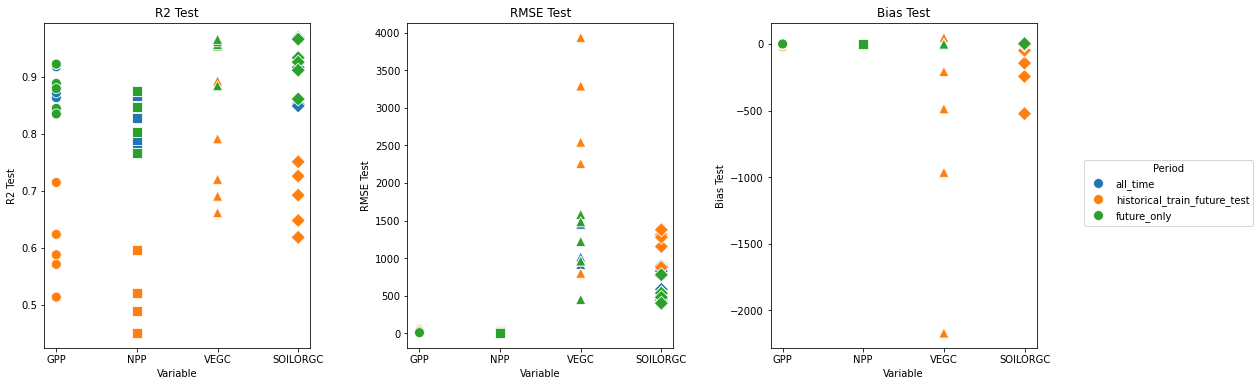

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# List of columns to plot and their respective titles
columns = ['R2 Test', 'RMSE Test', 'Bias Test']
titles = ['R2 Test', 'RMSE Test', 'Bias Test']

# Markers for each variable
markers = {var: marker for var, marker in zip(model_compare['Variable'].unique(), ['o', 's', '^', 'D'])}

for idx, (col, title) in enumerate(zip(columns, titles)):
    sns.scatterplot(
        data=model_compare,
        x='Variable',
        y=col,
        hue='period',
        style='Variable',
        markers=markers,
        s=100,  # Increase marker size
        ax=axs[idx]
    )
    axs[idx].set_title(title)
    axs[idx].legend_.remove()  # Remove legends from individual plots

# Create a custom legend only for the 'period' column
handles, labels = axs[0].get_legend_handles_labels()
# Extract unique handles and labels for 'period'
period_handles = {}
for handle, label in zip(handles, labels):
    if label in model_compare['period'].unique() and label not in period_handles:
        period_handles[label] = handle

# Add the custom legend
fig.legend(period_handles.values(), period_handles.keys(), loc='center left', bbox_to_anchor=(.85, 0.5), title="Period")

# Adjust layout for better readability
fig.tight_layout(pad=3.0, rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to make room for the legend



plt.show()